In [1996]:
# Geely Auto Machine Learning Assignment
# Author: Ashutosh Kumar
# Contact Details: Phone: +91-8904866645, Email: ashutoshind2017@outlook.com

In [1997]:
# Problem Statement:

# A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and 
# producing cars locally to give competition to their US and European counterparts. 
# They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. 
# Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be
# very different from the Chinese market. The company wants to know:

# Which variables are significant in predicting the price of a car
# How well those variables describe the price of a car
# Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the
# American market. 

# Business Goal :
# You are required to model the price of cars with the available independent variables. It will be used by the management to 
# understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars,
# the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand 
# the pricing dynamics of a new market. 

In [1998]:
###################################### Assignment Starts Here ######################################

In [1999]:
# Importing required python libraries which will be used for the assignment : 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# importing machine learning libraries and functions to be used in the assignment : scikitleran and statsmodel 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [2000]:
# Step 1: Reading and Understanding the Data:
# Let's start with the following steps:

# Importing data using the pandas library
# Understanding the structure of the data

In [2001]:
# Importing the dataset for the information of the cars and building the dataframe:

df_geely_carprice_data = pd.read_csv('CarPrice_Assignment.csv')

In [2002]:
# Having first glance of car price data:

df_geely_carprice_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [2003]:
# Examining the dataset imported:

#Examining the data frame for the shape, datatypes, NUlls etc
print(df_geely_carprice_data.shape)
print(df_geely_carprice_data.info())

(205, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
pea

In [2004]:
# So the dataset has no null values and it has 205 rows and 26 columns

In [2005]:
#Finding number of NULLs for each column in dataset:
df_geely_carprice_data.isnull().sum(axis=0)

#Finding the null percentage of the data set for all columns:
#(Find the percentage of missing values for all the columns)
print(round(100*(df_geely_carprice_data.isnull().sum(axis=0)/len(df_geely_carprice_data.index)),2))

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64


In [2006]:
# Since there are no missing values as above , so no missing value treatment is needed in our dataset.

In [2007]:
# Finding the datatypes of the columns/variables:
print(df_geely_carprice_data.dtypes)

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object


In [2008]:
# Checking the distribution of numerical variables in the dataset (statistical information) :
df_geely_carprice_data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


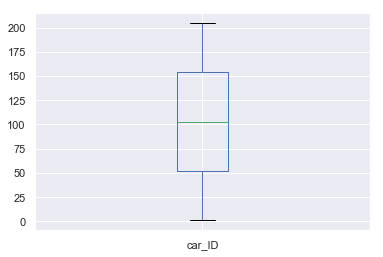

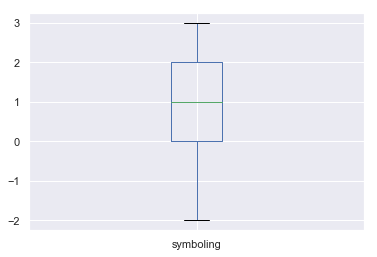

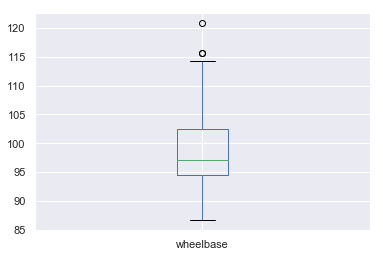

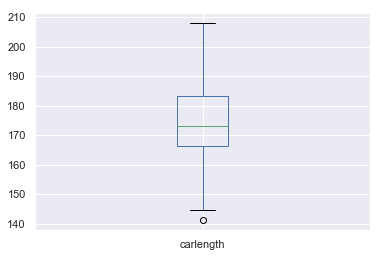

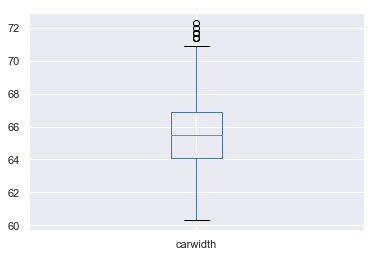

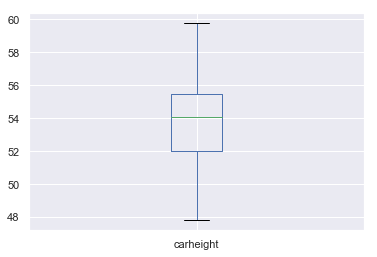

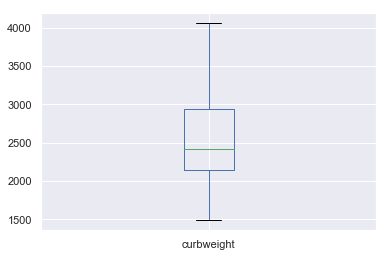

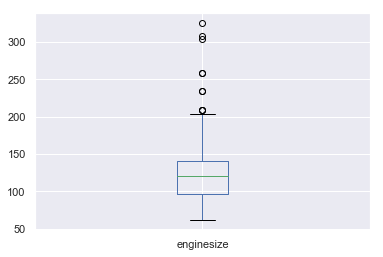

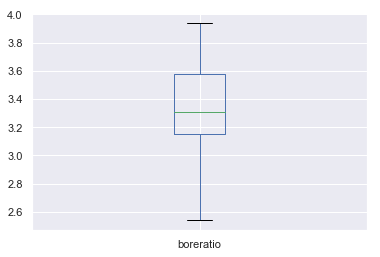

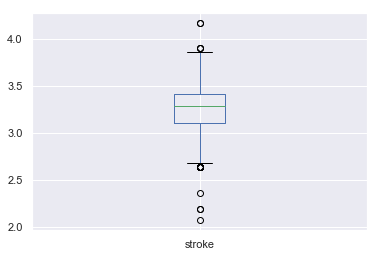

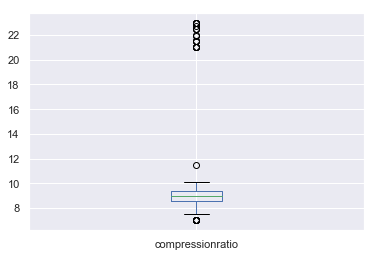

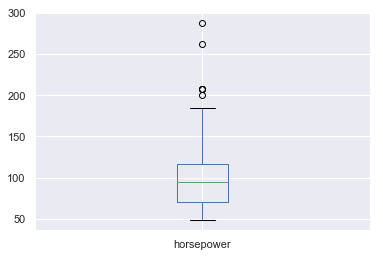

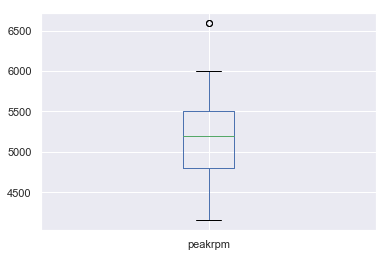

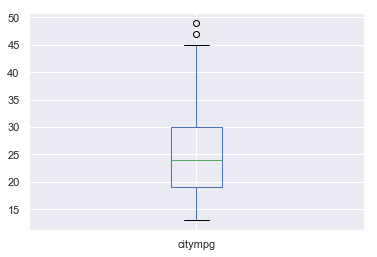

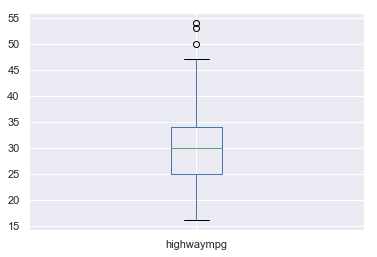

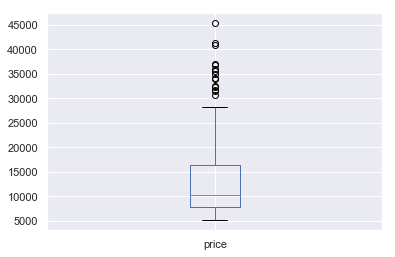

In [2009]:
# Outlier detection in the dataset:

# Identifying the data columns which are numerical:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df_geely_carprice_data.select_dtypes(include=numerics)
#numeric_df.head()

for column in numeric_df:
    plt.figure()
   # numeric_df.plot(kind='box')
    numeric_df.boxplot([column])

In [2010]:
# Inference:

# As we can see from above boxplots of numerical columns, there are few outliers namely for the columns wheelbase, enginesize,
# stroke, compressionratio, horsepower, price etc but we will not treat them now as part of EDA.
# These will be taken care when we will be using the scaling for building our linear regression model.

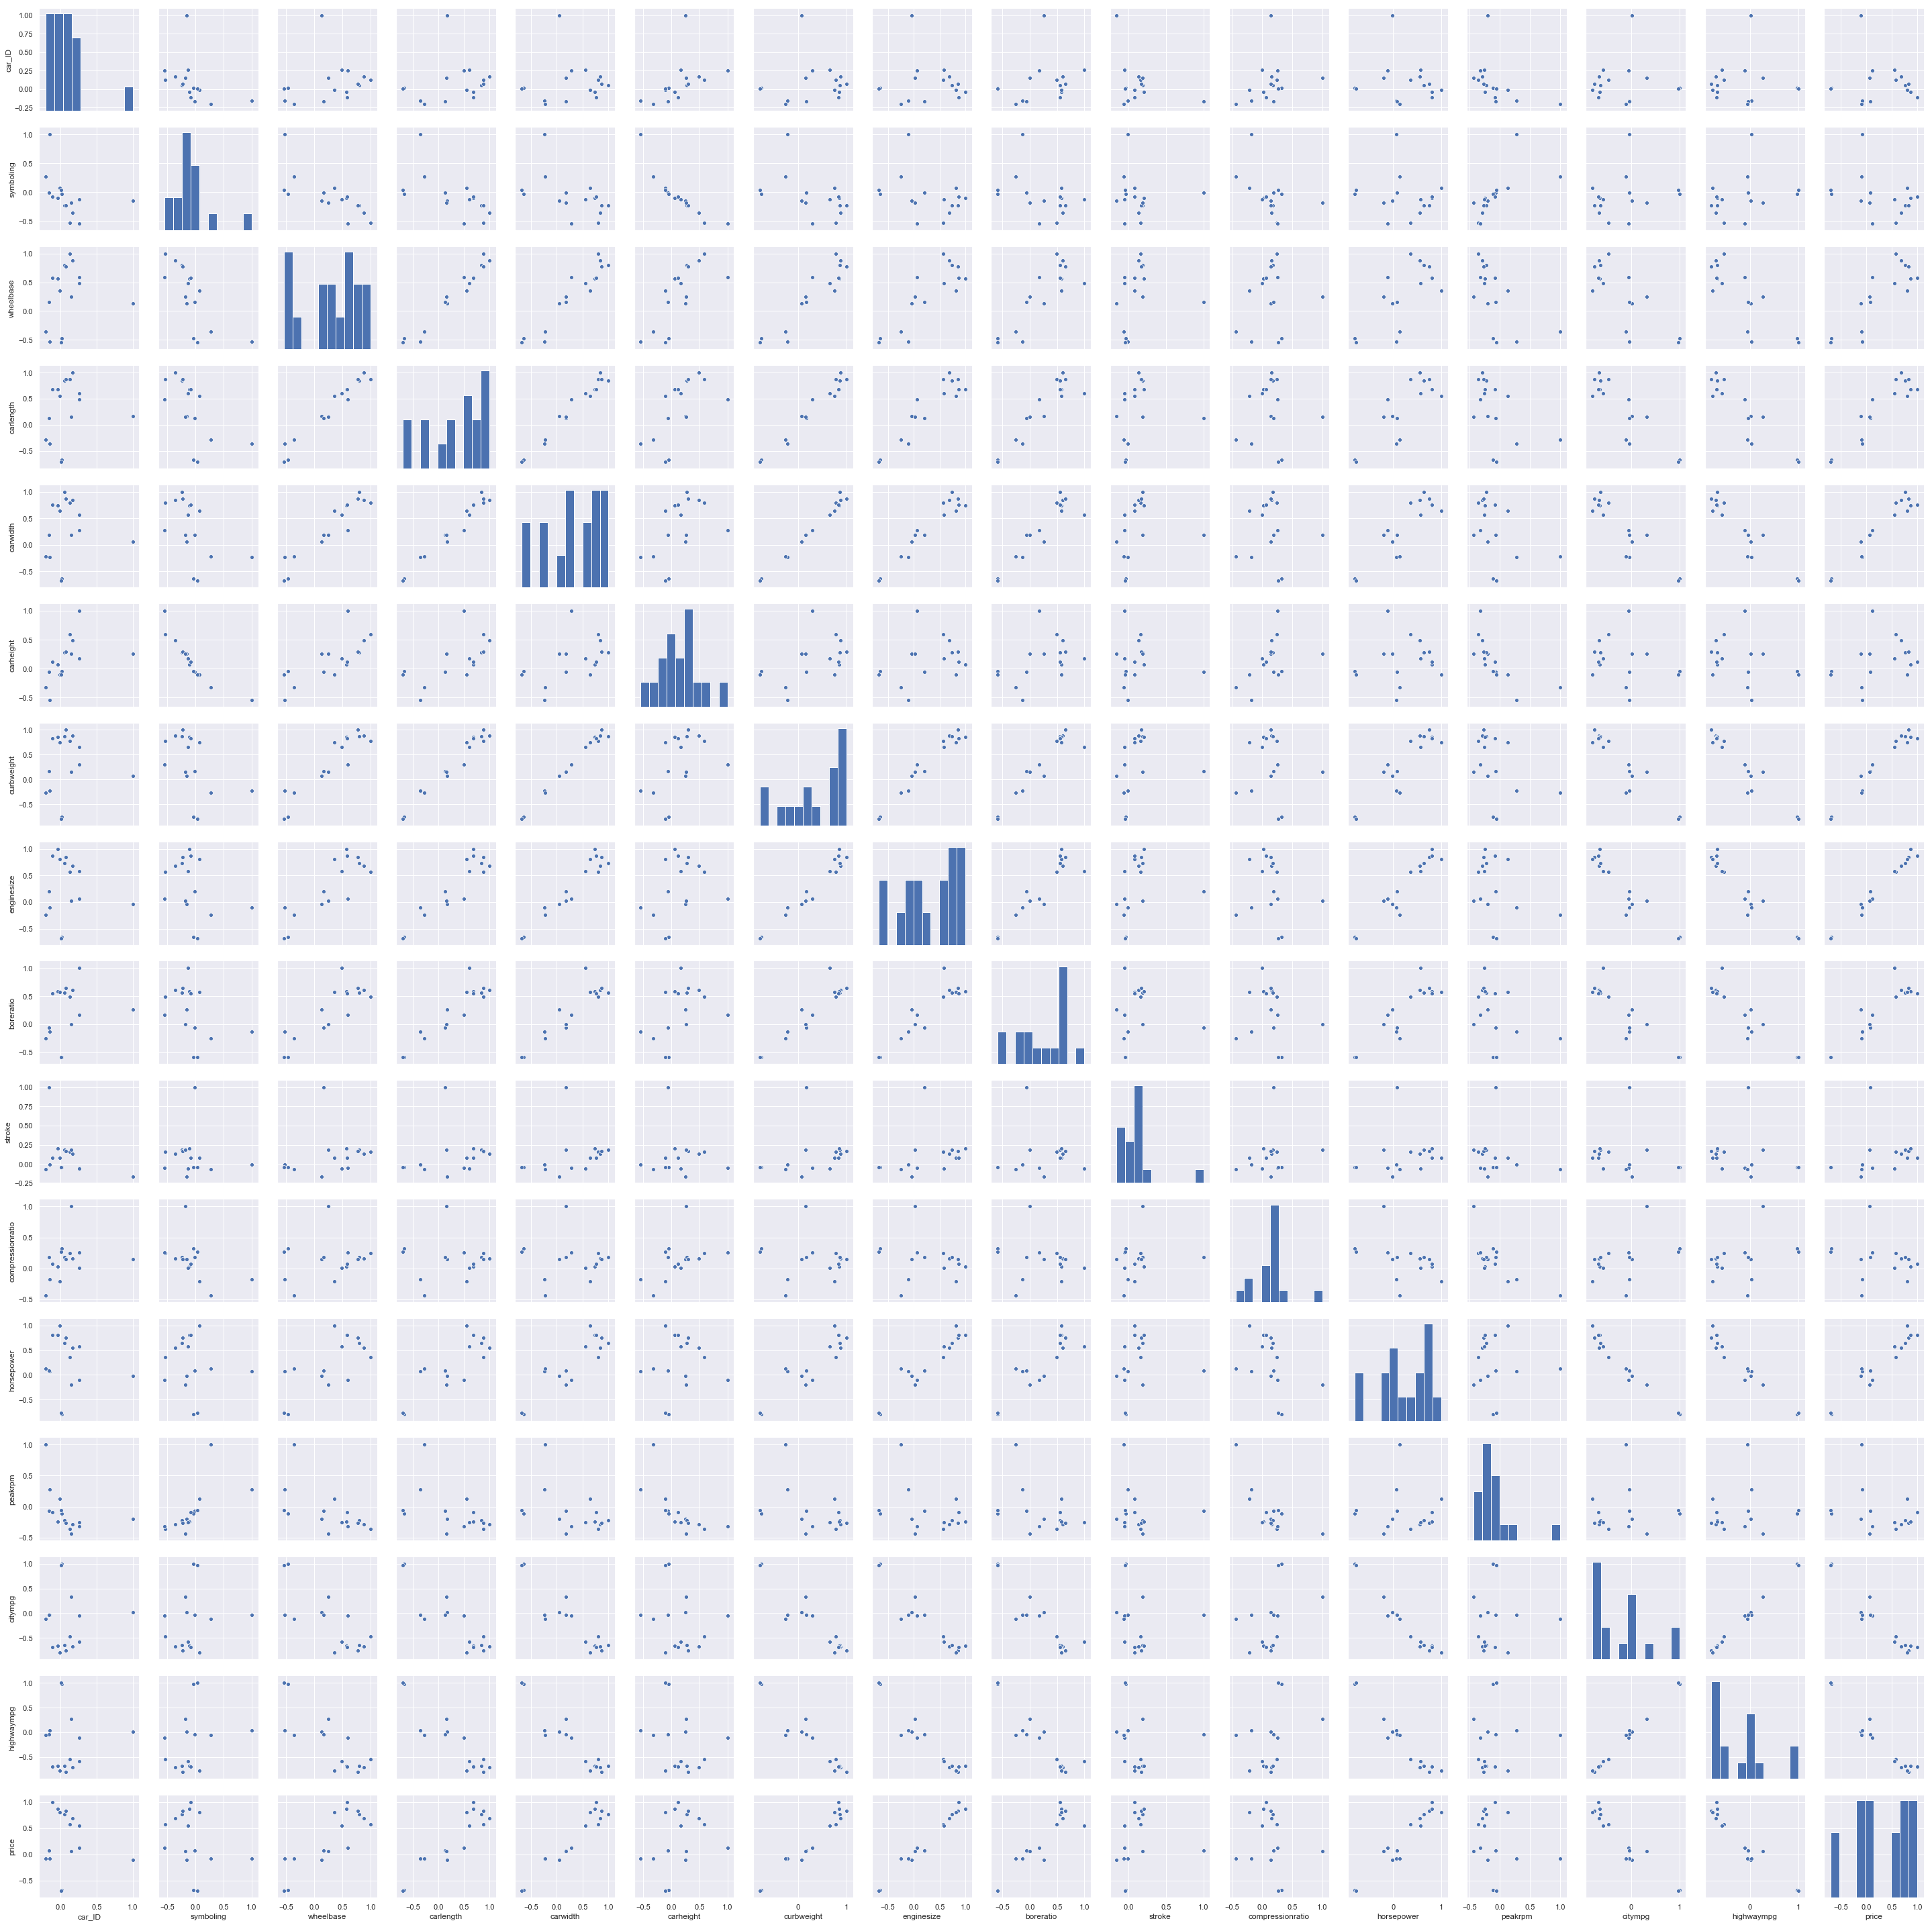

In [2011]:
# Visualising all the variables using the pairplot:

car_corr = df_geely_carprice_data.corr() 
sns.set(font_scale=1) 
sns.pairplot(car_corr,palette="husl") 
plt.show()

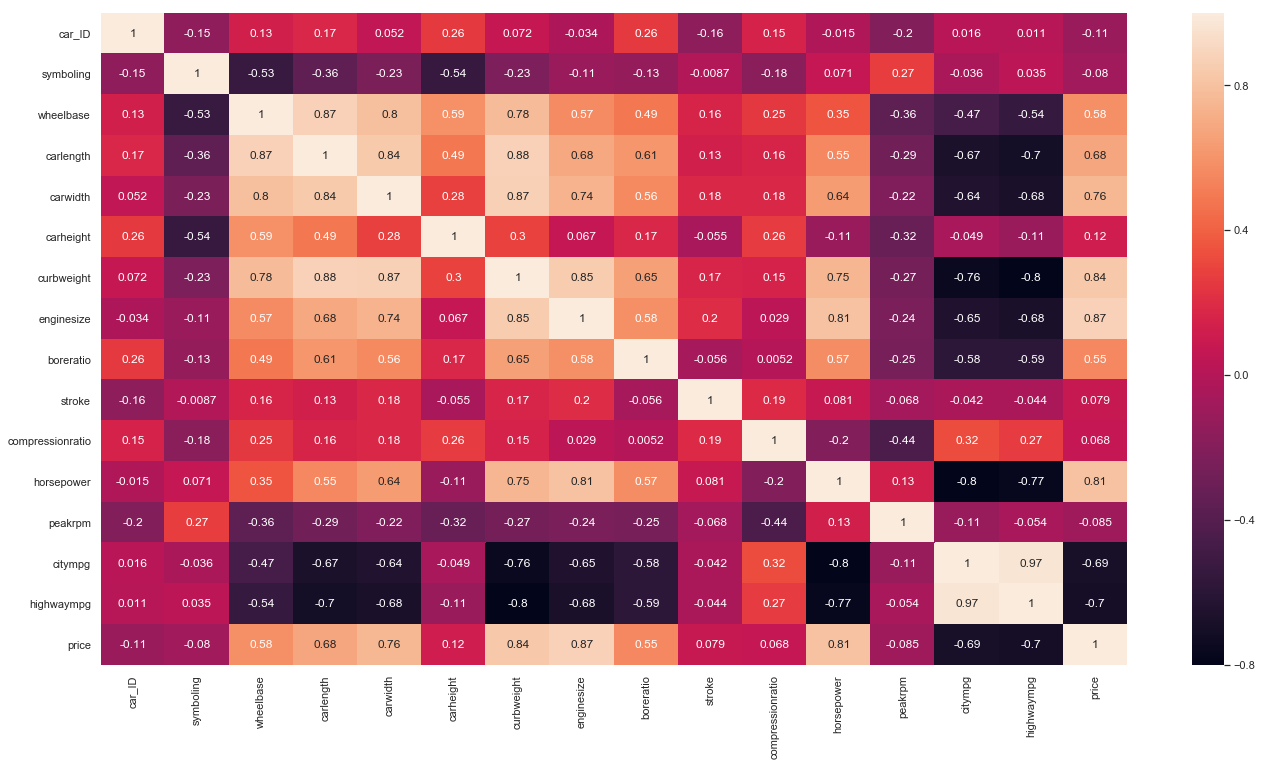

In [2012]:
# Visualising the full data using the heatmap:

plt.figure(figsize = (23,12))  
sns.heatmap(car_corr,  annot = True)
plt.show()

In [2013]:
# Inferences:

# 1. From above heatmap there is very strong correlation between citympg and highwaympg (0.97), carlength, curbweight, wheelbase
# and carwidth . 
# But we will not drop them as we will consider the same during VIF calculation in our model.

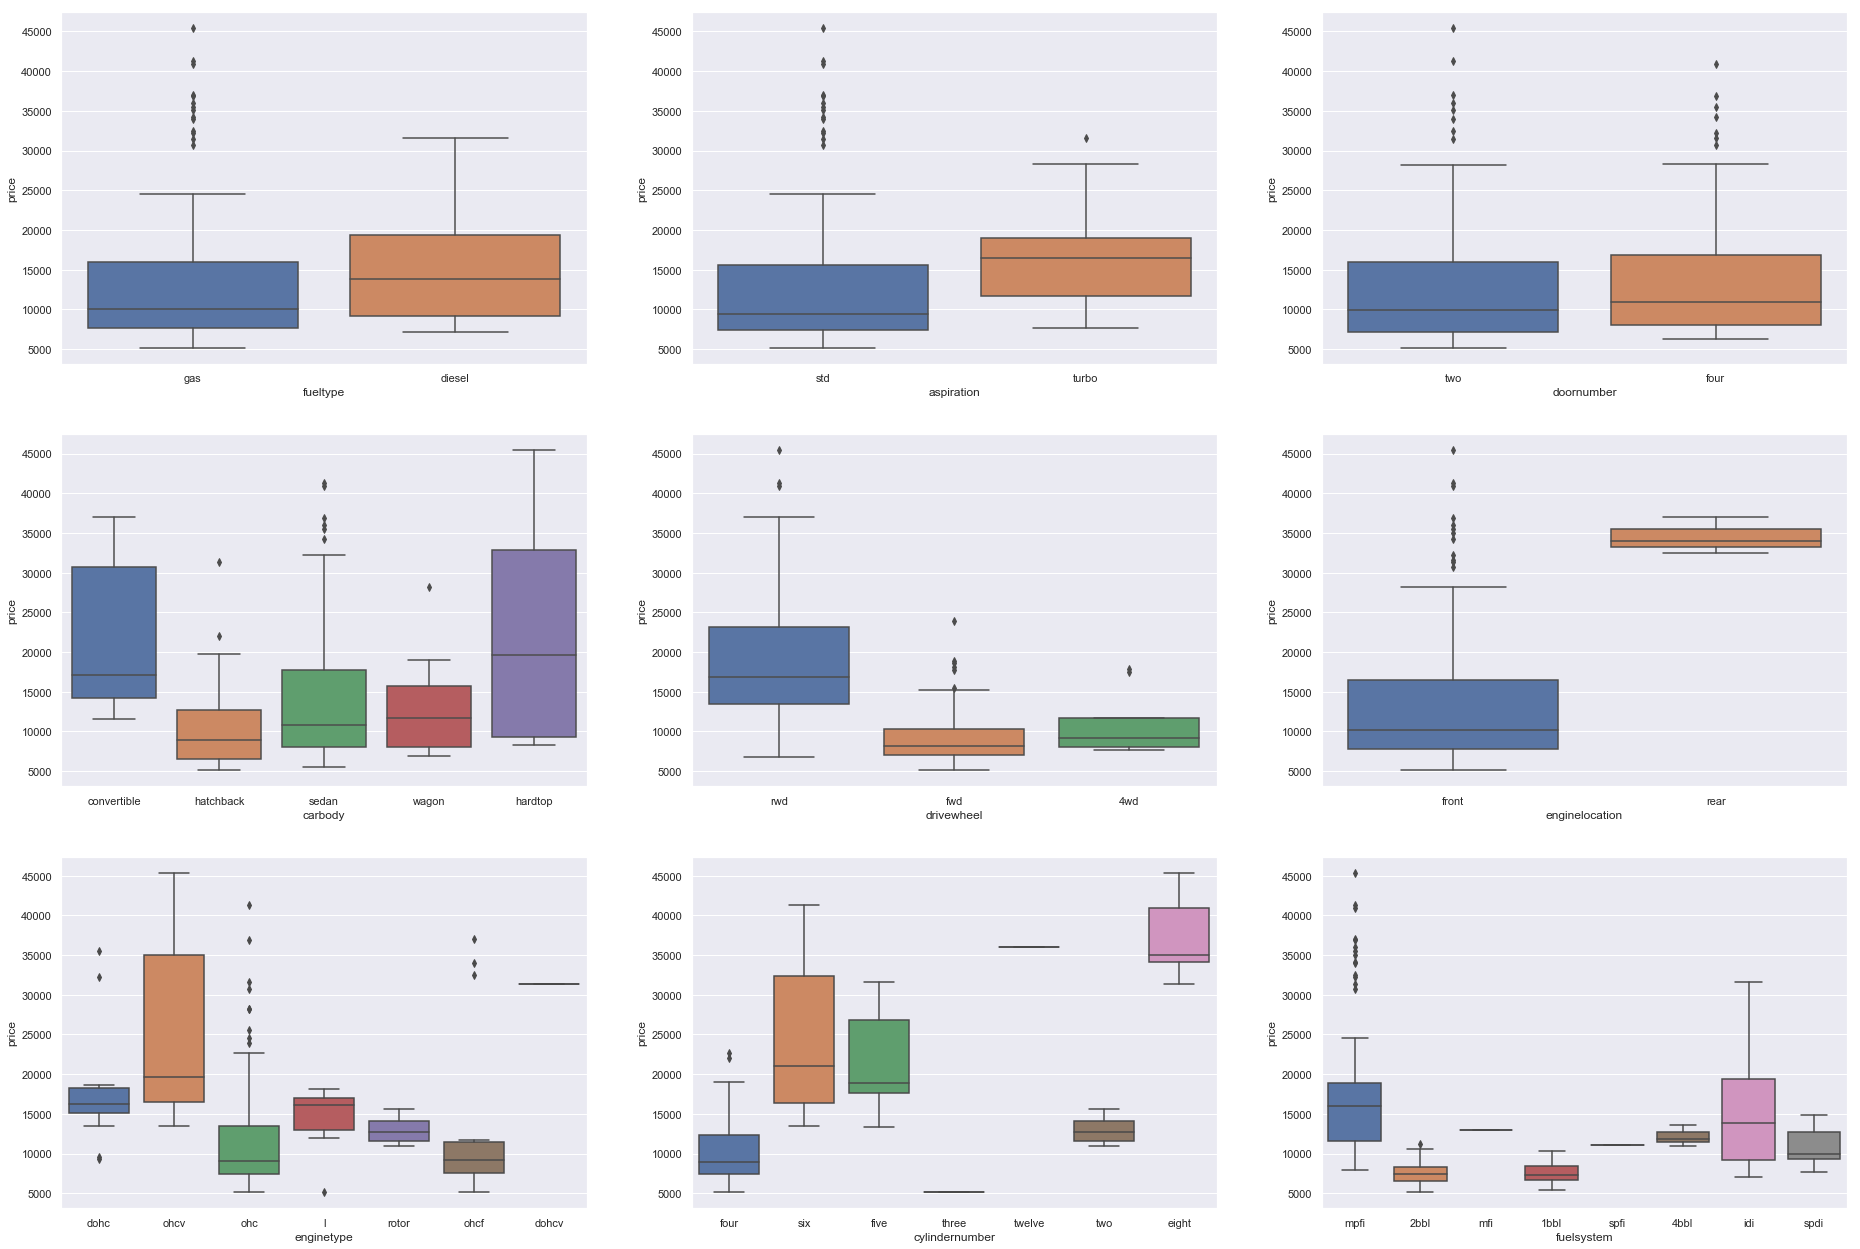

In [2014]:
# Visualising Categorical Variables spread with respect to the target variable price :

#defining the figure size for plot:
plt.figure(figsize=(32, 22))

plt.subplot(3,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = df_geely_carprice_data)
plt.subplot(3,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = df_geely_carprice_data)
plt.subplot(3,3,3)
sns.boxplot(x = 'doornumber', y = 'price', data = df_geely_carprice_data)
plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = df_geely_carprice_data)
plt.subplot(3,3,5)
sns.boxplot(x = 'drivewheel', y = 'price', data = df_geely_carprice_data)
plt.subplot(3,3,6)
sns.boxplot(x = 'enginelocation', y = 'price', data = df_geely_carprice_data)
plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'price', data = df_geely_carprice_data)
plt.subplot(3,3,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = df_geely_carprice_data)
plt.subplot(3,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = df_geely_carprice_data)            
plt.show()

In [2015]:
# Step 2: Data Cleaning, Preparation and Engineering:

In [2016]:
# Since its expected that we should be considering only car company for our model, we are extracting it from CarName column:

# Creating new column companyname as new indpendent variable for only car company name:
CompanyName = df_geely_carprice_data['CarName'].apply(lambda x : x.split(' ')[0])
df_geely_carprice_data.insert(3,"CompanyName",CompanyName)

#Dropping CarName as this information is not needed anynmore:
df_geely_carprice_data.drop(['CarName'],axis=1,inplace=True)
df_geely_carprice_data.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [2017]:
# Checking names of the different company carnames:

print(df_geely_carprice_data.CompanyName.unique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']


In [2018]:
# As we can see that there seems to be data issue with the car company names as few of them seems to be mispelled, this needs to
# be treated:

# From domain/general understanding we know the correct names and we will be replacing the incorrect names with correct ones:

# Converting company names to lower case:
df_geely_carprice_data.CompanyName = df_geely_carprice_data.CompanyName.str.lower()

# Function to replace the car names with correct ones:
def replace_name(x,y):
    df_geely_carprice_data.CompanyName.replace(x,y,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

# Printing distinct compant car names:
print(df_geely_carprice_data.CompanyName.unique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


In [2019]:
#Checking for duplicates:

df_geely_carprice_data.loc[df_geely_carprice_data.duplicated()]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


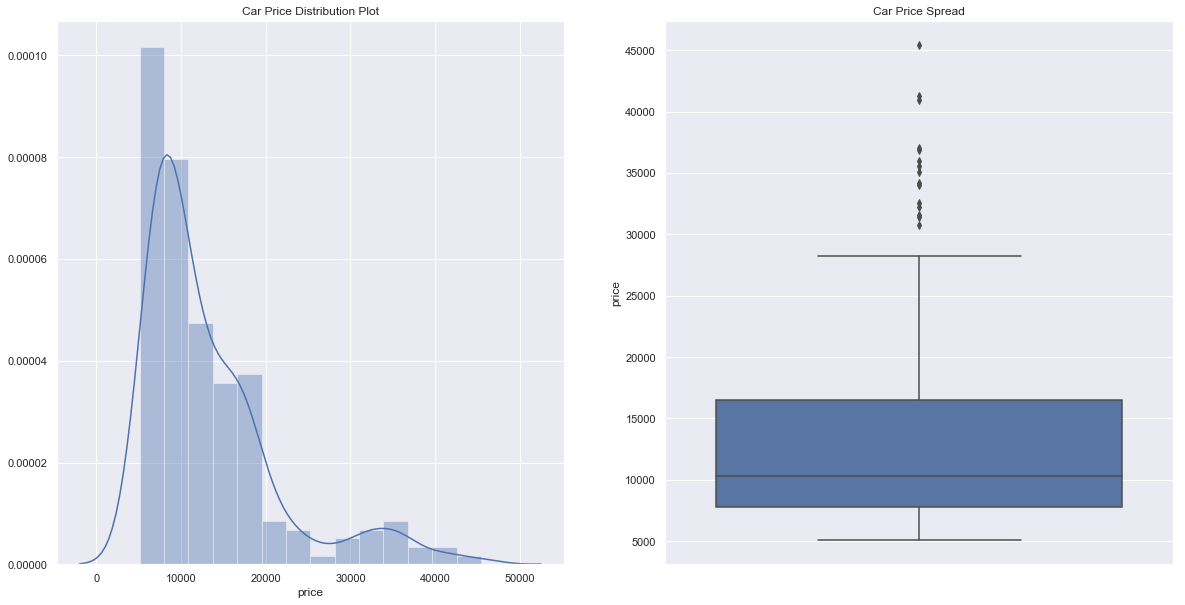

In [2020]:
# Plotting the Car Price distribution in the dataframe:

plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(df_geely_carprice_data.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=df_geely_carprice_data.price)

plt.show()

In [2021]:
# Inference :

# The plot seemed to be right-skewed, meaning that the most prices in the dataset are low(Below 15,000).
# There is a significant difference between the mean and the median of the price distribution.
# The data points are far spread out from the mean, which indicates a high variance in the car prices.
# (85% of the prices are below 18,500, whereas the remaining 15% are between 18,500 and 45,400.)

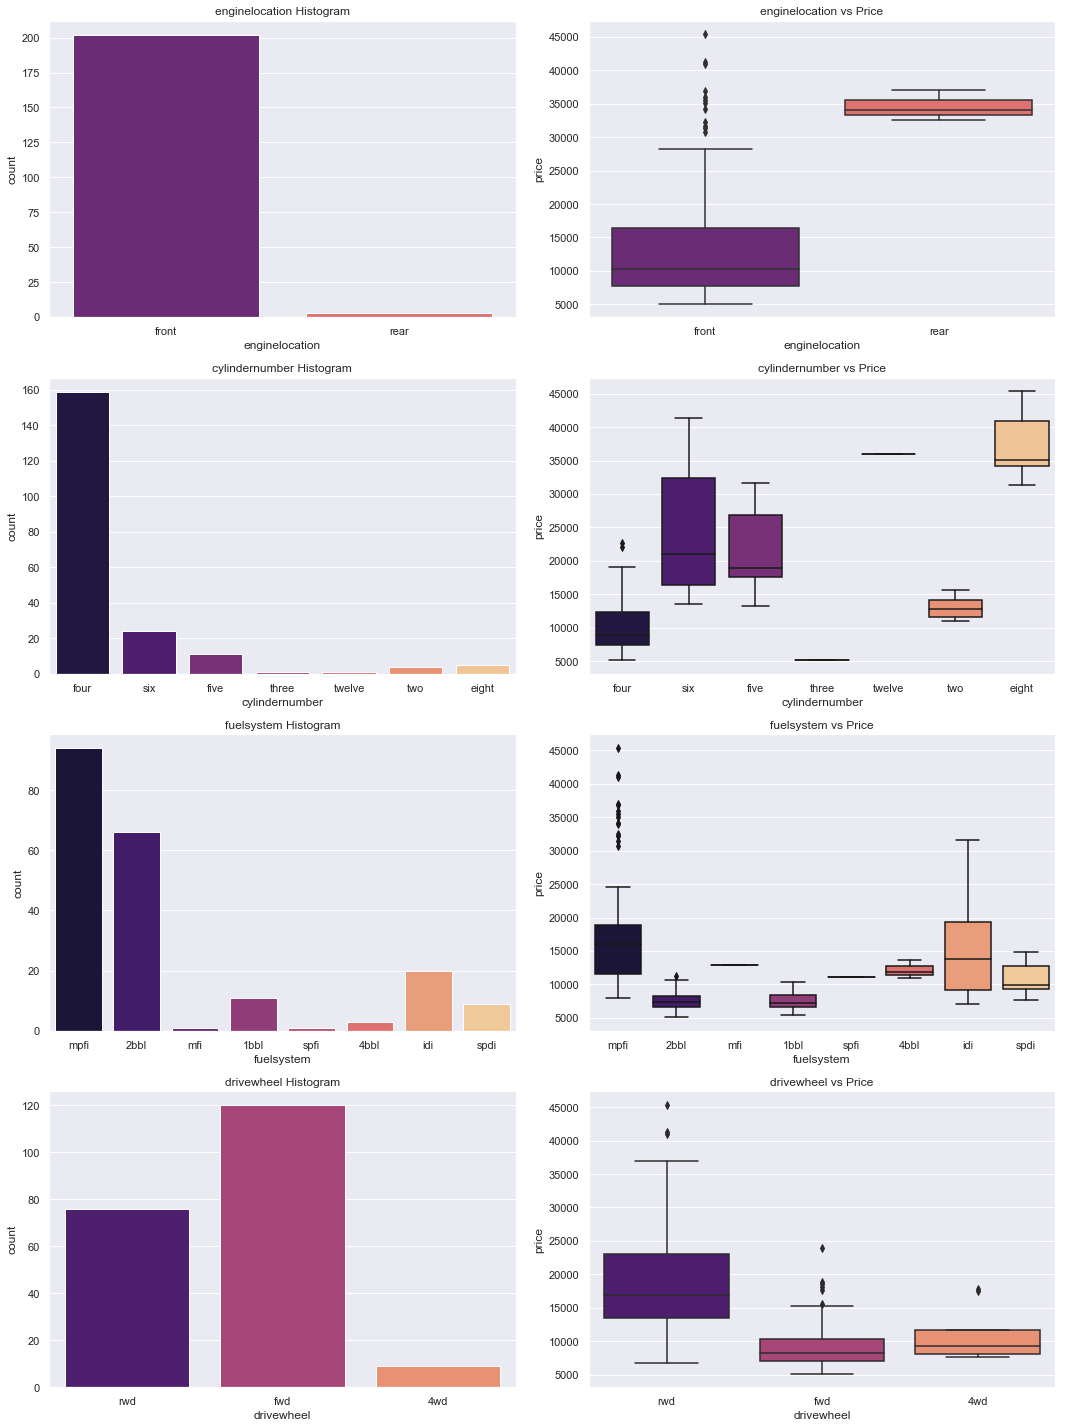

In [2022]:
# Perforrming Bivariate Analysis for carprice against other variables:

def plot_count(x,fig):
    plt.subplot(4,2,fig)
    plt.title(x+' Histogram')
    sns.countplot(df_geely_carprice_data[x],palette=("magma"))
    plt.subplot(4,2,(fig+1))
    plt.title(x+' vs Price')
    sns.boxplot(x=df_geely_carprice_data[x], y=df_geely_carprice_data.price, palette=("magma"))
    
plt.figure(figsize=(15,20))

plot_count('enginelocation', 1)
plot_count('cylindernumber', 3)
plot_count('fuelsystem', 5)
plot_count('drivewheel', 7)

plt.tight_layout()



In [2023]:
# Inference :

# Very few datapoints for enginelocation categories to make an inference.
# Most common number of cylinders are four, six and five. Though eight cylinders have the highest price range.
# mpfi and 2bbl are most common type of fuel systems. mpfi and idi having the highest price range. But there are few data for 
# other categories to derive any meaningful inference
# A very significant difference in drivewheel category. Most high ranged cars seeme to prefer rwd drivewheel.

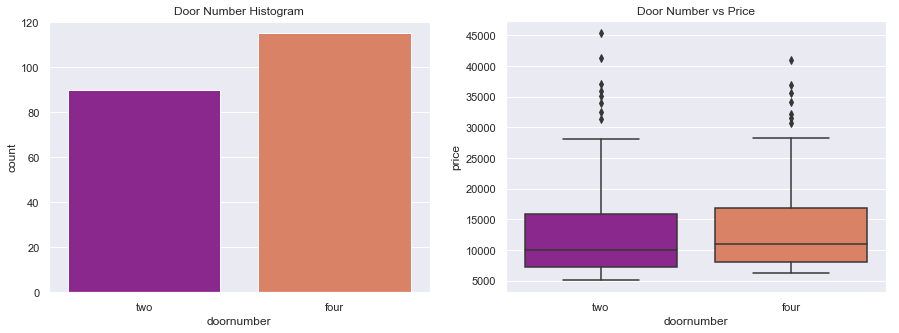

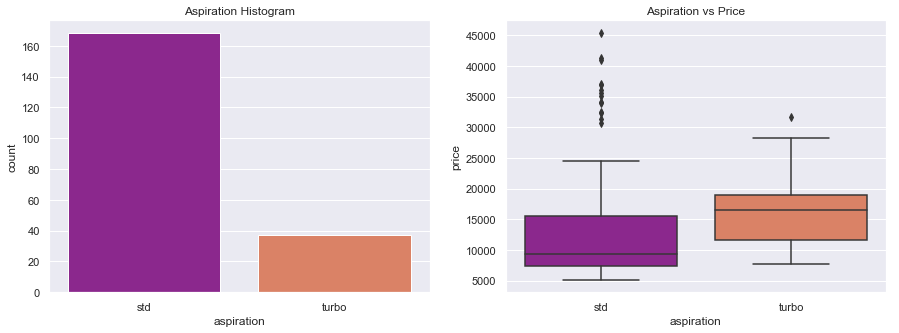

In [2024]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Door Number Histogram')
sns.countplot(df_geely_carprice_data.doornumber, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Door Number vs Price')
sns.boxplot(x=df_geely_carprice_data.doornumber, y=df_geely_carprice_data.price, palette=("plasma"))

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Aspiration Histogram')
sns.countplot(df_geely_carprice_data.aspiration, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Aspiration vs Price')
sns.boxplot(x=df_geely_carprice_data.aspiration, y=df_geely_carprice_data.price, palette=("plasma"))

plt.show()

In [2025]:
# Inference:

# doornumber variable is not affacting the price much. There is no sugnificant difference between the categories in it.
# It seems aspiration with turbo have higher price range than the std in general.

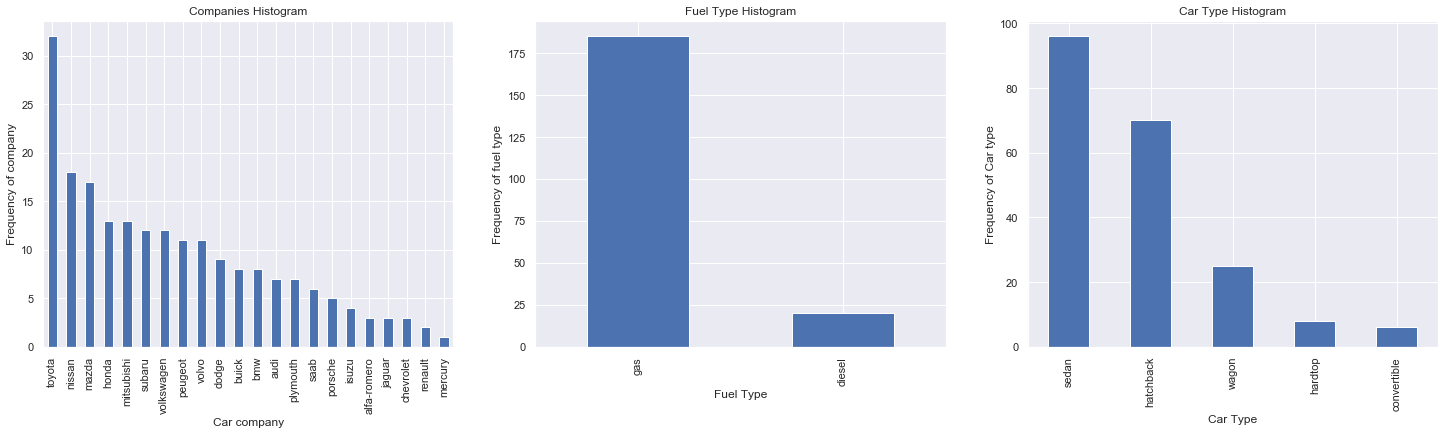

In [2026]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = df_geely_carprice_data.CompanyName.value_counts().plot('bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1 = df_geely_carprice_data.fueltype.value_counts().plot('bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = df_geely_carprice_data.carbody.value_counts().plot('bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()

In [2027]:
# Inference :

# Toyota seemed to be favored car company.
# Number of gas fueled cars are more than diesel.
# sedan is the top car type prefered followed by hatchback.

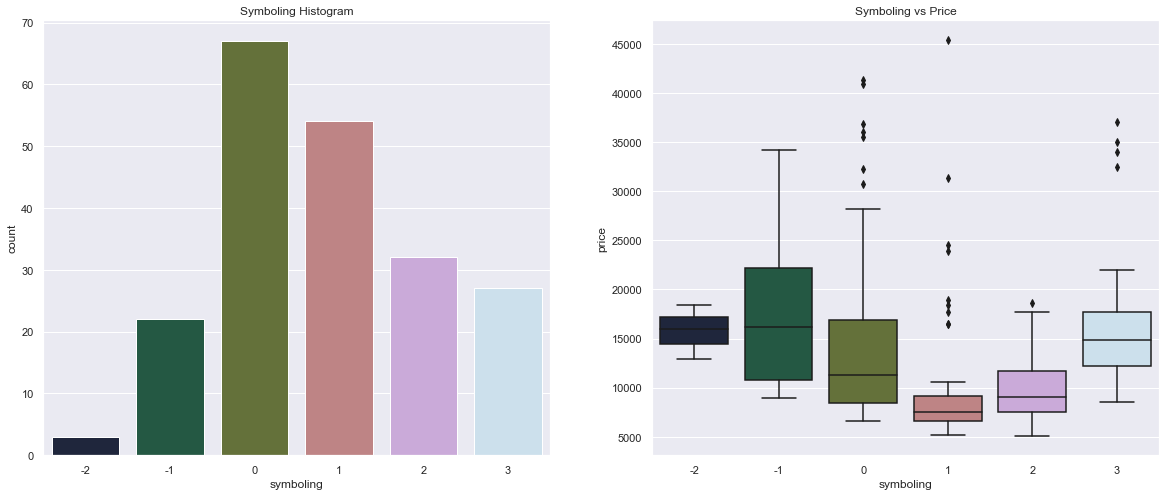

In [2028]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Symboling Histogram')
sns.countplot(df_geely_carprice_data.symboling, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x=df_geely_carprice_data.symboling, y=df_geely_carprice_data.price, palette=("cubehelix"))

plt.show()

In [2029]:
# Inference :

# It seems that the symboling with 0 and 1 values have high number of rows (i.e. They are most sold.)
# The cars with -1 symboling seems to be high priced (as it makes sense too, insurance risk rating -1 is quite good). 
# But it seems that symboling with 3 value has the price range similar to -2 value. There is a dip in price at symboling 1.

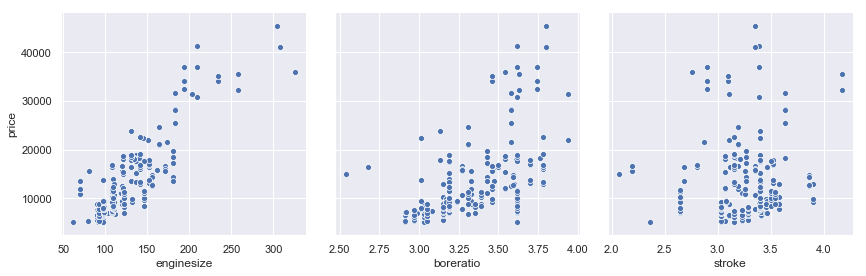

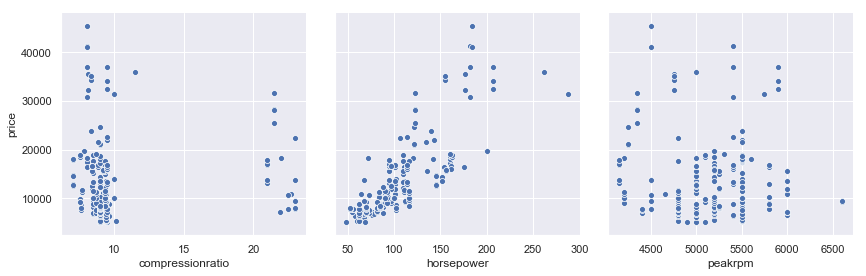

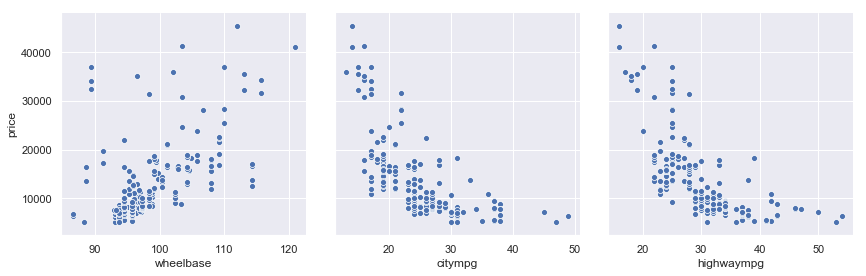

In [2030]:
# Using pairplot for analysing numerical variables (Bivariate):

def pairplot(x,y,z):
    sns.pairplot(df_geely_carprice_data, x_vars=[x,y,z], y_vars='price',size=4, aspect=1, kind='scatter')
    plt.show()

pairplot('enginesize', 'boreratio', 'stroke')
pairplot('compressionratio', 'horsepower', 'peakrpm')
pairplot('wheelbase', 'citympg', 'highwaympg')

In [2031]:
# Inference:
    
# enginesize, boreratio, horsepower, wheelbase - seem to have a significant positive correlation with price.
# citympg, highwaympg - seem to have a significant negative correlation with price.

In [2032]:
# Re-checking the data-frame:

df_geely_carprice_data.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [2033]:
# Data pre-processing:

In [2034]:
# Dropping the column "car_ID" as this is just a sequence:

df_geely_carprice_data.drop(['car_ID'],axis=1,inplace=True)

In [2035]:
# since the correlation between city mileage and highway mileage is very high, we will drop them and create a derived column:

print(round(df_geely_carprice_data['citympg'].corr(df_geely_carprice_data['highwaympg']),4))

0.9713


In [2036]:
# Deriving new features (feature-enginerring):

df_geely_carprice_data['fueleconomy'] = (0.55 * df_geely_carprice_data['citympg']) + (0.45 * df_geely_carprice_data['highwaympg'])

In [2037]:
# Dropping the columns mentioned above as new column fueleconomy is created for the same:

df_geely_carprice_data.drop(['citympg'],axis=1,inplace=True)
df_geely_carprice_data.drop(['highwaympg'],axis=1,inplace=True)

In [2038]:
# Further feature- engineering:

df_geely_carprice_data['powertowtratio'] =  df_geely_carprice_data['horsepower']/df_geely_carprice_data['curbweight']

In [2039]:
# Handling and preparing cateogorical variables to numerical so that it can be used in ML model:

In [2040]:
# Pre-processing the symboling variable :

# Converting it to string:
#df_geely_carprice_data['symboling'] = df_geely_carprice_data['symboling'].astype('str') 

# Function to classify the symboling:

def symbol(x):
    if x >=-3 and x <= -1:
        return 'No Risk'
    elif x >=0 and x <=1:
        return 'Low Risk'
    else:
        return 'High Risk'
    
df_geely_carprice_data['symboling'] = df_geely_carprice_data['symboling'].apply(symbol)
df_geely_carprice_data['symboling'] = df_geely_carprice_data['symboling'].astype('str')

In [2041]:
# Use this encoder to encode values from sklearn library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_geely_carprice_data['symboling'] = le.fit_transform(df_geely_carprice_data['symboling'])

# Checking unique values of this column after encoding and its datatype: 
df_geely_carprice_data['symboling'].unique() 

array([0, 1, 2], dtype=int64)

In [2042]:
# We can observe that for two columns cylindernumber and doornumber which are ordered categorical variables, the numbers are 
# in words, hence we will perform custom encoding through map to convert into numerical value:

# List of variables to map

varlist =  ['cylindernumber', 'doornumber']

# Defining the map function
def encoding_map(x):
    return x.map({'two': 2,"three" : 3,"four": 4, "five" : 5, "six" : 6, "eight" : 8 , "twelve" : 12})

# Applying the function to the housing list
df_geely_carprice_data[varlist] = df_geely_carprice_data[varlist].apply(encoding_map)


In [2043]:
# Re-examining the dataframe and datatypes:

df_geely_carprice_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling           205 non-null int32
CompanyName         205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null int64
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null int64
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
price          

In [2044]:
# Data before applying dummy encoding:

df_geely_carprice_data.head()

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,fueleconomy,powertowtratio
0,0,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,13495.0,23.70,0.043564
1,0,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,16500.0,23.70,0.043564
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,16500.0,22.15,0.054552
3,0,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,13950.0,26.70,0.043646
4,0,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,17450.0,19.80,0.040722


In [2045]:
# We need to perform dummy encoding for the variables with datatype "object" above which are unordered categorical variable
# This is needed to convert them into numerical variable which can be used in ML model:

# Defining the map function for encoding:
def dummies_encoder(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

# Applying map fucntion to required variables:
df_geely_carprice_data = dummies_encoder('CompanyName',df_geely_carprice_data)
df_geely_carprice_data = dummies_encoder('fueltype',df_geely_carprice_data)
df_geely_carprice_data = dummies_encoder('aspiration',df_geely_carprice_data)
df_geely_carprice_data = dummies_encoder('carbody',df_geely_carprice_data)
df_geely_carprice_data = dummies_encoder('drivewheel',df_geely_carprice_data)
df_geely_carprice_data = dummies_encoder('enginetype',df_geely_carprice_data)
df_geely_carprice_data = dummies_encoder('enginelocation',df_geely_carprice_data)
df_geely_carprice_data = dummies_encoder('fuelsystem',df_geely_carprice_data)

In [2046]:
# Data after applying dummy encoding:

df_geely_carprice_data.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,ohcv,rotor,rear,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,0,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,1,0,0
1,0,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,1,0,0
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,...,1,0,0,0,0,0,0,1,0,0
3,0,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,...,0,0,0,0,0,0,0,1,0,0
4,0,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,...,0,0,0,0,0,0,0,1,0,0


In [2047]:
# Since all the variables are now numerical, we can proceed with Splitting the first step in ML:

# Splitting the Data into Training and Testing Sets:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively:
#np.random.seed(0)
df_geely_train, df_geely_test = train_test_split(df_geely_carprice_data, train_size = 0.7, test_size = 0.3, random_state = 42)


In [2048]:
# Examining the training dataframes(dataset) data and info:

df_geely_train.shape

(143, 60)

In [2049]:
# Examining the test dataframes(dataset) data and info:

df_geely_test.shape

(62, 60)

In [ ]:
# Scaling the test data and training data :
# Apply scaler() to all the columns except the 'dummy' variables and unordered categorical columns:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','price']
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','carheight',
            'stroke','price','compressionratio','peakrpm','cylindernumber','doornumber']

df_geely_train[num_vars] = scaler.fit_transform(df_geely_train[num_vars])
df_geely_test[num_vars] = scaler.transform(df_geely_test[num_vars])



In [ ]:
# Examining the training dataframes(dataset) data:

df_geely_train.head()

In [ ]:
# Examining the test dataframes(dataset) data:
df_geely_test.head()

In [ ]:
# Examining the test dataframes(dataset) data:
df_geely_train.info()

In [ ]:
# Examining the test dataframes(dataset) data:
df_geely_test.info()

In [ ]:
# Examining the training dataframes(dataset) data statistical information:
df_geely_train.describe()

In [ ]:
# Correlation of the variables:
df_geely_train.corr()


In [ ]:
#Correlation using heatmap
plt.figure(figsize = (38, 30))
sns.heatmap(df_geely_train.corr(), annot = True, cmap = plt.cm.hot)
plt.show()



In [ ]:
# we can conclude from initial glance of correlation that:

# price is highly positively correlated with variables - curbweight, enginesize, horsepower,carwidth and carlength etc.

# We will anslyse further when we have built ML model.

In [ ]:
# Dividing data into X and y variables for model building:

y_train = df_geely_train.pop('price')
X_train = df_geely_train

In [ ]:
# Using Recursive Feature Elimination (RFE) of scikilt learn library to perform automated course feature selection:

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE and taking top 20 feature for our model building:
rfe = RFE(lm, 20)            
rfe = rfe.fit(X_train, y_train)

In [ ]:
# Ranking of the column by RFE for feature importance:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

In [ ]:
# Columns significant according to RFC:
col = X_train.columns[rfe.support_]
col

In [ ]:
# Building model using statsmodel, for the detailed statistics:

# Creating X_test dataframe with RFE selected variables:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()


In [ ]:
################################### Model Building starts ################################

In [ ]:
# Model1:

#Build a linear model for all the columns 

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_rfe)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

print(lr_1.summary())

#X_train_new = build_model(X_train_rfe,y_train)

In [ ]:
# Checking VIF of model1:

#Calculating the Variance Inflation Factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


In [ ]:
X_train_rfe.corr()

In [ ]:
# Corelation Matrix of Model 1:

plt.figure(figsize = (21,11))  
sns.heatmap(X_train_rfe.corr(),annot = True)

In [ ]:
# As the VIF value of subaru and ohcf are infinite and correlation is very high (0.94), we are dropping "ohcf":
# As ohcf has high 

X = X_train_rfe.drop(["subaru"], axis = 1)

In [ ]:
# Model 2:

X_train_lm = sm.add_constant(X)
lr_2 = sm.OLS(y_train, X_train_lm).fit()

print(lr_2.summary())

In [1931]:
# Checking VIF of model2:

#Calculating the Variance Inflation Factor
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,powertowtratio,110.31
3,enginesize,49.31
2,cylindernumber,46.43
0,wheelbase,38.17
4,boreratio,35.44
1,carwidth,28.29
5,horsepower,28.24
14,sedan,17.25
6,peakrpm,11.10
13,hatchback,11.03


In [1932]:
# Since the variable wheelbase is having high p-value(0.129) and  high VIF(38.17), so removing it:

X = X.drop(["wheelbase"], axis = 1)


In [1933]:
# Model 3:

X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     152.9
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.46e-75
Time:                        21:07:13   Log-Likelihood:                 256.54
No. Observations:                 143   AIC:                            -475.1
Df Residuals:                     124   BIC:                            -418.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4534      0.070      6.

In [1934]:
# Checking VIF of model3:

#Calculating the Variance Inflation Factor

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
6,powertowtratio,109.86
2,enginesize,46.17
1,cylindernumber,43.73
3,boreratio,34.64
4,horsepower,28.12
0,carwidth,17.34
13,sedan,12.96
5,peakrpm,11.10
12,hatchback,9.32
14,wagon,3.92


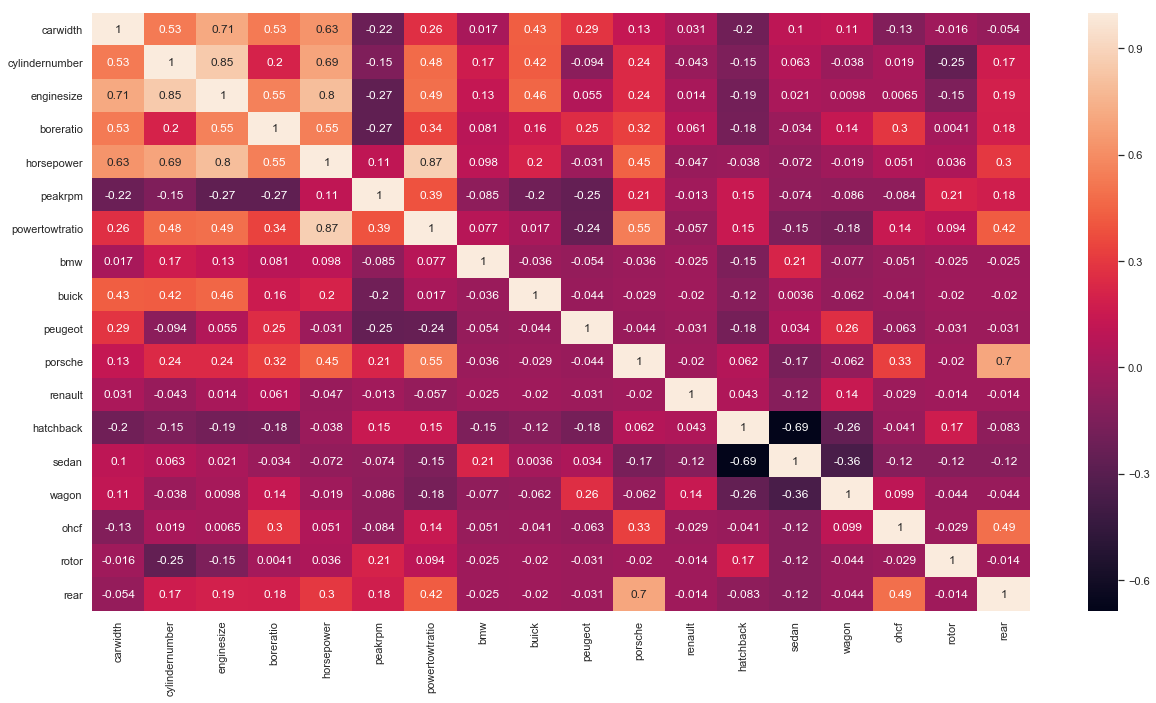

In [1935]:
# re-checking the correlation:

plt.figure(figsize = (21,11))  
sns.heatmap(X.corr(),annot = True)

In [1936]:
# Since the variable powertowtratio is having very high VIF(109.86) and highly correlated with horsepower, removing it:

X = X.drop(["powertowtratio"], axis = 1)

In [1937]:
# Model 4:

X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     119.8
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           9.45e-69
Time:                        21:07:17   Log-Likelihood:                 235.54
No. Observations:                 143   AIC:                            -435.1
Df Residuals:                     125   BIC:                            -381.7
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0526      0.039      1.

In [1938]:
# Checking VIF of model4:

#Calculating the Variance Inflation Factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,enginesize,37.85
1,cylindernumber,31.36
3,boreratio,18.76
0,carwidth,16.60
4,horsepower,15.78
12,sedan,11.06
5,peakrpm,8.14
11,hatchback,6.95
13,wagon,3.73
16,rear,3.00


In [1939]:
# Since the variable peakrpm is having  high p-value(0.310) and very high VIF(8.14), so removing it:

X = X.drop(["peakrpm"], axis = 1)

In [1940]:
# Model 5:

X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     127.2
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.38e-69
Time:                        21:07:17   Log-Likelihood:                 234.95
No. Observations:                 143   AIC:                            -435.9
Df Residuals:                     126   BIC:                            -385.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0704      0.035      1.

In [1941]:
# Checking VIF of model5:

#Calculating the Variance Inflation Factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,enginesize,29.06
1,cylindernumber,28.02
3,boreratio,17.44
0,carwidth,16.57
4,horsepower,13.62
11,sedan,10.17
10,hatchback,6.35
12,wagon,3.50
15,rear,2.66
8,porsche,2.62


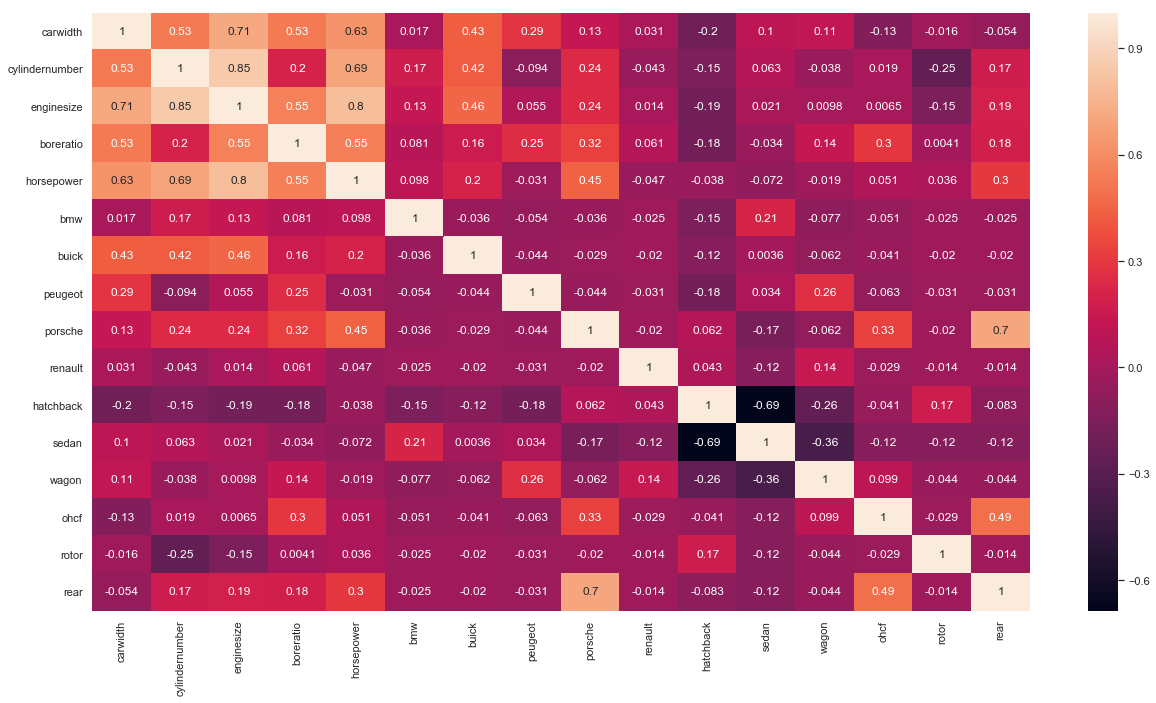

In [1942]:
# re-checking the correlation:

plt.figure(figsize = (21,11))  
sns.heatmap(X.corr(),annot = True)

In [1943]:
# Since the variable cylindernumber is having very high VIF(28.02) and correlation is very high(0.88) with enginesize:

X = X.drop(["cylindernumber"], axis = 1)

In [1944]:
# Model 6:

X_train_lm = sm.add_constant(X)

lr_6 = sm.OLS(y_train, X_train_lm).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     128.2
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           5.19e-69
Time:                        21:07:33   Log-Likelihood:                 230.63
No. Observations:                 143   AIC:                            -429.3
Df Residuals:                     127   BIC:                            -381.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0060      0.028      0.218      0.8

In [1945]:
# Checking VIF of model6:

#Calculating the Variance Inflation Factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,16.45
1,enginesize,15.54
2,boreratio,14.64
3,horsepower,13.19
10,sedan,5.08
9,hatchback,3.13
14,rear,2.66
7,porsche,2.59
11,wagon,2.28
5,buick,1.79


In [1946]:
# Since the variable boreratio is having high p-value(0.237) and high VIF(14.64), so removing it:

X = X.drop(["boreratio"], axis = 1)

In [1947]:
# Model 7:

X_train_lm = sm.add_constant(X)

lr_7 = sm.OLS(y_train, X_train_lm).fit()
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     136.9
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           8.75e-70
Time:                        21:07:35   Log-Likelihood:                 229.84
No. Observations:                 143   AIC:                            -429.7
Df Residuals:                     128   BIC:                            -385.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0125      0.023     -0.547      0.5

In [1948]:
# Checking VIF of model7:

#Calculating the Variance Inflation Factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,15.86
1,enginesize,14.77
2,horsepower,13.04
9,sedan,3.68
13,rear,2.65
6,porsche,2.55
8,hatchback,2.25
10,wagon,1.92
4,buick,1.79
11,ohcf,1.46


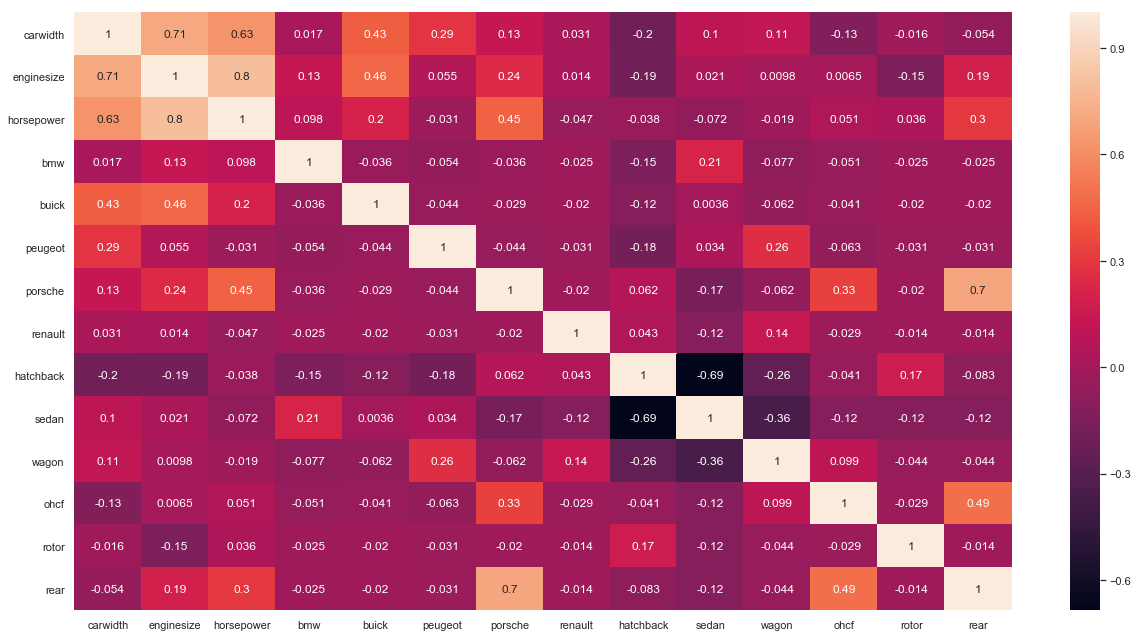

In [1949]:
# re-checking the correlation:

plt.figure(figsize = (21,11))  
sns.heatmap(X.corr(),annot = True)

In [1950]:
# enginesize is having huge VIF of 14.77 and is strongly correlated (0.8) with horsepower, hence removing it:

X = X.drop(["enginesize"], axis = 1)

In [1951]:
# Model 8:

X_train_lm = sm.add_constant(X)

lr_8 = sm.OLS(y_train, X_train_lm).fit()
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     111.3
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.02e-63
Time:                        21:07:37   Log-Likelihood:                 210.68
No. Observations:                 143   AIC:                            -393.4
Df Residuals:                     129   BIC:                            -351.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0136      0.026      0.530      0.5

In [1952]:
# Checking VIF of model8:

#Calculating the Variance Inflation Factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,14.16
1,horsepower,7.15
8,sedan,3.67
12,rear,2.56
5,porsche,2.40
7,hatchback,2.24
9,wagon,1.92
3,buick,1.56
10,ohcf,1.46
4,peugeot,1.44


In [1953]:
# porsche variable has extremely high p value (0.914), hence removing it:

X = X.drop(["porsche"], axis = 1)

In [1954]:
# Model 9:

X_train_lm = sm.add_constant(X)

lr_9 = sm.OLS(y_train, X_train_lm).fit()
print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     121.5
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.80e-64
Time:                        21:07:39   Log-Likelihood:                 210.67
No. Observations:                 143   AIC:                            -395.3
Df Residuals:                     130   BIC:                            -356.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0140      0.025      0.552      0.5

In [1955]:
# Checking VIF of model 9:

#Calculating the Variance Inflation Factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,14.06
1,horsepower,6.92
7,sedan,3.50
6,hatchback,2.23
8,wagon,1.87
11,rear,1.70
3,buick,1.53
9,ohcf,1.46
4,peugeot,1.44
2,bmw,1.13


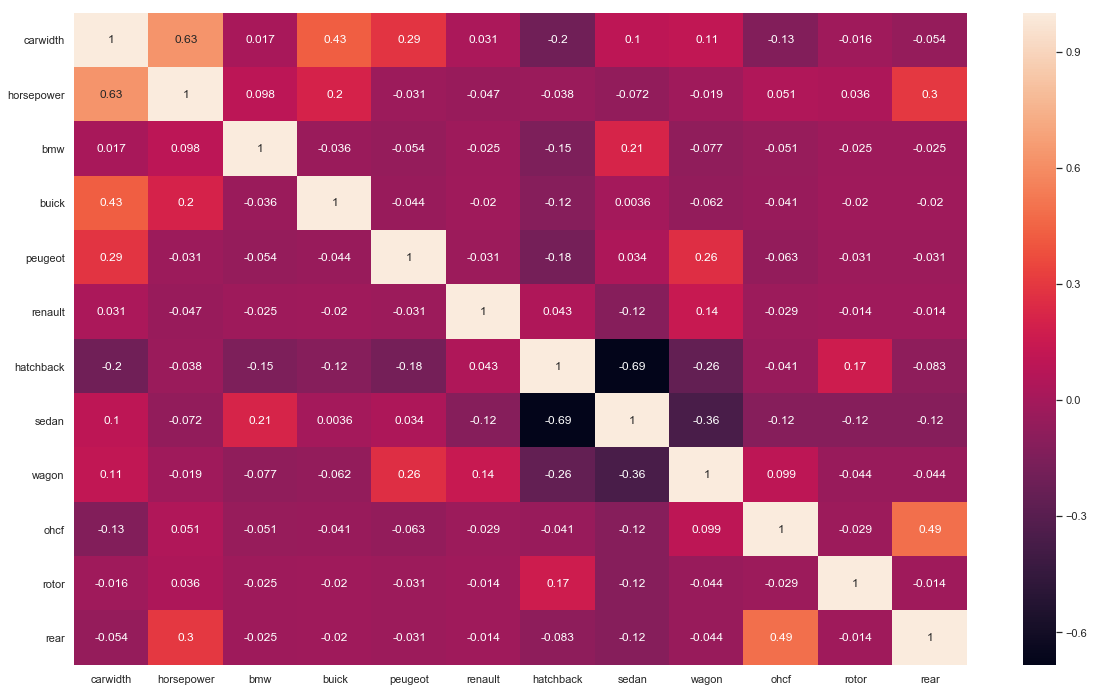

In [1956]:
# re-checking the correlation:

# Corelation Matrix :

plt.figure(figsize = (20,12))  
sns.heatmap(X.corr(),annot = True)

In [1957]:
# Variables hatchback and sedan are highly correlated (-0.69) and sedan is having high VIF (3.5):

X = X.drop(["sedan"], axis = 1)

In [1958]:
# Model 10:

X_train_lm = sm.add_constant(X)

lr_10 = sm.OLS(y_train, X_train_lm).fit()
print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     122.6
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.41e-63
Time:                        21:07:41   Log-Likelihood:                 205.10
No. Observations:                 143   AIC:                            -386.2
Df Residuals:                     131   BIC:                            -350.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0565      0.013     -4.185      0.0

In [1959]:
# Checking VIF of model 10:

#Calculating the Variance Inflation Factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,7.67
1,horsepower,6.62
10,rear,1.68
6,hatchback,1.48
8,ohcf,1.43
4,peugeot,1.40
7,wagon,1.36
3,buick,1.28
2,bmw,1.09
5,renault,1.07


In [1960]:
# As we can see that hardtop is having high p-value (0.492), so removing it:

X = X.drop(["peugeot"], axis = 1)

In [1961]:
# Model 11:

X_train_lm = sm.add_constant(X)

lr_11 = sm.OLS(y_train, X_train_lm).fit()
print(lr_11.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     135.4
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.56e-64
Time:                        21:07:43   Log-Likelihood:                 204.84
No. Observations:                 143   AIC:                            -387.7
Df Residuals:                     132   BIC:                            -355.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0551      0.013     -4.137      0.0

In [1962]:
# Checking VIF of model 11:

#Calculating the Variance Inflation Factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,6.27
1,horsepower,6.04
9,rear,1.65
5,hatchback,1.46
7,ohcf,1.42
6,wagon,1.31
3,buick,1.23
2,bmw,1.09
4,renault,1.05
8,rotor,1.05


In [1963]:
# we can see that ohcf is having high p value: 

X = X.drop(["ohcf"], axis = 1)

In [1964]:
# Model 12:

X_train_lm = sm.add_constant(X)

lr_12 = sm.OLS(y_train, X_train_lm).fit()
print(lr_12.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     150.4
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           3.22e-65
Time:                        21:07:45   Log-Likelihood:                 204.33
No. Observations:                 143   AIC:                            -388.7
Df Residuals:                     133   BIC:                            -359.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0572      0.013     -4.351      0.0

In [1965]:
# Checking VIF of model 12:
#Calculating the Variance Inflation Factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,6.26
1,horsepower,6.03
5,hatchback,1.44
6,wagon,1.27
8,rear,1.27
3,buick,1.23
2,bmw,1.09
4,renault,1.05
7,rotor,1.05


In [1966]:
# Now the p-value of renault is high (0.300), hence renoving it:

X = X.drop(["renault"], axis = 1)

In [1967]:
# Model 13:

X_train_lm = sm.add_constant(X)

lr_13 = sm.OLS(y_train, X_train_lm).fit()
print(lr_13.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     169.0
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           4.10e-66
Time:                        21:07:49   Log-Likelihood:                 203.76
No. Observations:                 143   AIC:                            -389.5
Df Residuals:                     134   BIC:                            -362.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0567      0.013     -4.316      0.0

In [1968]:
# Checking VIF of model 13:

#Calculating the Variance Inflation Factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,6.22
1,horsepower,5.98
4,hatchback,1.43
7,rear,1.26
5,wagon,1.25
3,buick,1.23
2,bmw,1.09
6,rotor,1.05


In [1969]:
# Now pvalue of rotor is extremely high (0.170) so removing:

X = X.drop(["rotor"], axis = 1)

In [1970]:
# Model 14:

X_train_lm = sm.add_constant(X)

lr_14 = sm.OLS(y_train, X_train_lm).fit()
print(lr_14.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     191.6
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           7.31e-67
Time:                        21:07:51   Log-Likelihood:                 202.75
No. Observations:                 143   AIC:                            -389.5
Df Residuals:                     135   BIC:                            -365.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0569      0.013     -4.320      0.0

In [1971]:
# Checking VIF of model 14:

#Calculating the Variance Inflation Factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,6.21
1,horsepower,5.97
4,hatchback,1.39
6,rear,1.26
5,wagon,1.25
3,buick,1.23
2,bmw,1.09


In [1972]:
# Since carwidth is having high VIF (6.21), so removing the same:

X = X.drop(["carwidth"], axis = 1)

In [1973]:
# Model 15:

X_train_lm = sm.add_constant(X)

lr_15 = sm.OLS(y_train, X_train_lm).fit()
print(lr_15.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     123.8
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.36e-52
Time:                        21:07:53   Log-Likelihood:                 165.15
No. Observations:                 143   AIC:                            -316.3
Df Residuals:                     136   BIC:                            -295.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0275      0.013      2.153      0.0

In [1974]:
# Checking VIF of model 15:

#Calculating the Variance Inflation Factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,horsepower,1.83
3,hatchback,1.35
5,rear,1.14
4,wagon,1.13
2,buick,1.12
1,bmw,1.09


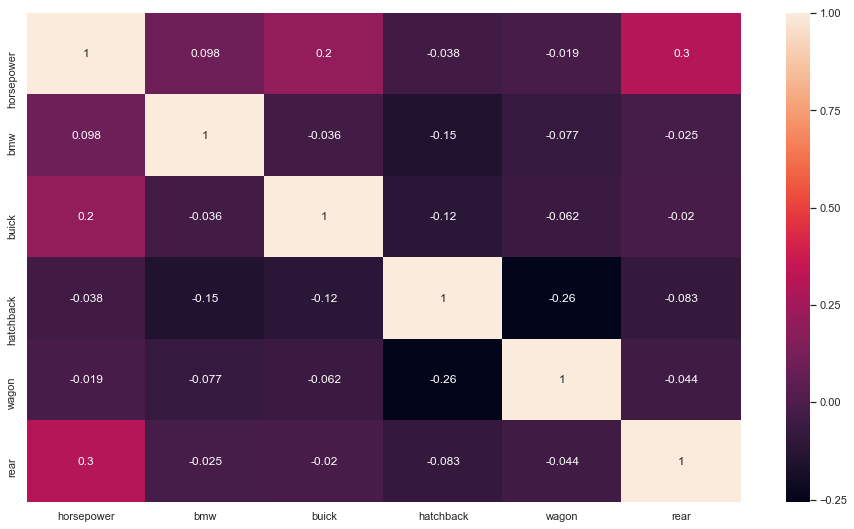

In [1975]:
# Final correlation matrix:

plt.figure(figsize = (16,9))  
sns.heatmap(X.corr(),annot = True)

Text(0.5, 0, 'Errors')

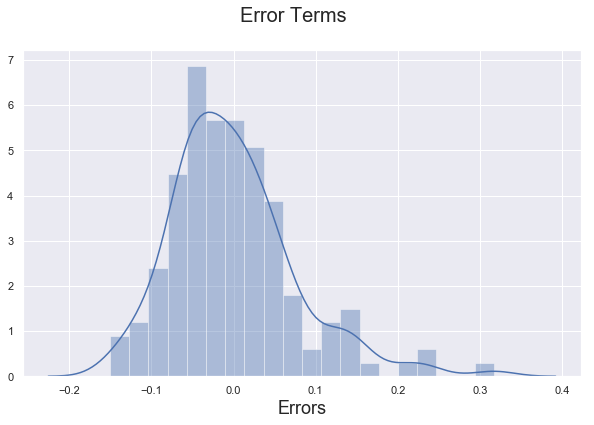

In [1976]:
# Residual Analysis of the train data:

# So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear 
# regression), let us plot the histogram of the error terms and see what it looks like.

# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

y_train_predict = lr_15.predict(X_train_lm)

# Plot the histogram of the error terms
fig = plt.figure(figsize = (10,6))
sns.distplot((y_train - y_train_predict), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label



In [1977]:
# Inferences:

# Error terms seem to be approximately normally distributed, so the assumption on the linear modeling seems to be fulfilled
# for our model.

In [1978]:
# Making Predictions Using the Final Model:

# Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions 
# using the final, i.e. fifteenth model.


In [1979]:
# checking test data:
df_geely_test.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,ohcv,rotor,rear,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
15,1,1.0,0.582759,0.765517,0.485714,0.658333,0.627948,0.4,0.542969,0.771429,...,0,0,0,0,0,0,0,1,0,0
9,1,0.0,0.444828,0.579310,0.580952,0.350000,0.549177,0.3,0.238281,0.421429,...,0,0,0,0,0,0,0,1,0,0
100,1,1.0,0.365517,0.496552,0.323810,0.575000,0.214953,0.2,0.195312,0.564286,...,0,0,0,1,0,0,0,0,0,0
132,0,0.0,0.431034,0.724138,0.447619,0.691667,0.373387,0.2,0.199219,0.714286,...,0,0,0,0,0,0,0,1,0,0
68,2,1.0,0.806897,0.798276,0.809524,0.908333,0.859368,0.3,0.441406,0.742857,...,0,0,0,0,0,1,0,0,0,0


In [1980]:
#Dividing into X and y:
y_test = df_geely_test.pop('price')
X_test = df_geely_test


In [1981]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 15 to 104
Data columns (total 59 columns):
symboling           62 non-null int32
doornumber          62 non-null float64
wheelbase           62 non-null float64
carlength           62 non-null float64
carwidth            62 non-null float64
carheight           62 non-null float64
curbweight          62 non-null float64
cylindernumber      62 non-null float64
enginesize          62 non-null float64
boreratio           62 non-null float64
stroke              62 non-null float64
compressionratio    62 non-null float64
horsepower          62 non-null float64
peakrpm             62 non-null float64
fueleconomy         62 non-null float64
powertowtratio      62 non-null float64
audi                62 non-null uint8
bmw                 62 non-null uint8
buick               62 non-null uint8
chevrolet           62 non-null uint8
dodge               62 non-null uint8
honda               62 non-null uint8
isuzu               62 non-nu

In [1982]:
X.head()

,horsepower,bmw,buick,hatchback,wagon,rear
177,0.169492,0,0,1,0,0
75,0.521186,0,0,1,0,0
174,0.088983,0,0,0,0,0
31,0.101695,0,0,1,0,0
12,0.292373,1,0,0,0,0


In [1983]:
X_train_lm.head()

,const,horsepower,bmw,buick,hatchback,wagon,rear
177,1.0,0.169492,0,0,1,0,0
75,1.0,0.521186,0,0,1,0,0
174,1.0,0.088983,0,0,0,0,0
31,1.0,0.101695,0,0,1,0,0
12,1.0,0.292373,1,0,0,0,0


In [1984]:
# Making predictions:

#X_train_lm = X_train_lm.drop('const',axis=1)

# Creating X_test_new dataframe by dropping variables from X_test
#X_test_new = X_test[X_train_lm.columns]
X = X_test[X.columns]

# Adding a constant variable 
#X_test_new = sm.add_constant(X_test_new)
X = sm.add_constant(X)


In [1985]:
# Making predictions
#y_pred = lr_15.predict(X_test_new)

y_pred = lr_15.predict(X)

In [1986]:
# Evaluate the model using the r2_score for test data:

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)


0.8599462320722799

Text(0, 0.5, 'y_pred')

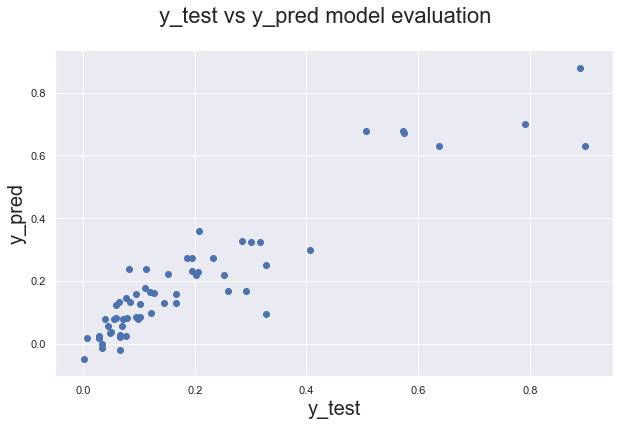

In [1987]:
# Plotting y_test and y_pred to understand the data spread :

fig = plt.figure(figsize = (10,6))
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred model evaluation', fontsize=22)              # Plot heading 
plt.xlabel('y_test', fontsize=20)                          # X-label
plt.ylabel('y_pred', fontsize=20)                          # Y-label

Text(0, 0.5, 'Car Prices')

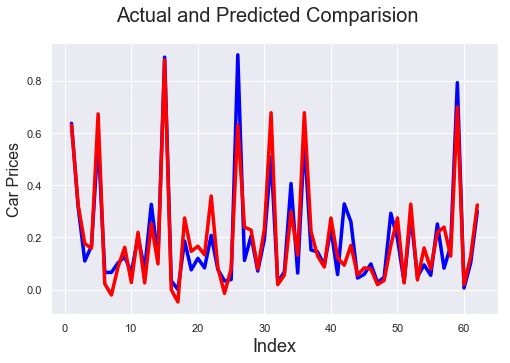

In [1988]:
# Actual vs Predicted data Analysis:

c = [i for i in range(1,63,1)]
fig = plt.figure(figsize = (8,5))
plt.plot(c,y_test, color="blue", linewidth=3.5, linestyle="-")     #Plotting Actual
plt.plot(c,y_pred, color="red",  linewidth=3.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted Comparision', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car Prices', fontsize=16)  

In [1989]:
# Residual analysis for model evaluation:

Text(0.5, 0, 'Errors')

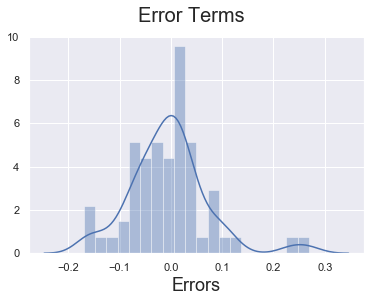

In [1990]:
# # So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear 
# regression), let us plot the histogram of the error terms and see what it looks like.

fig = plt.figure()
sns.distplot((y_test-y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   


Text(0, 0.5, 'ytest-ypred')

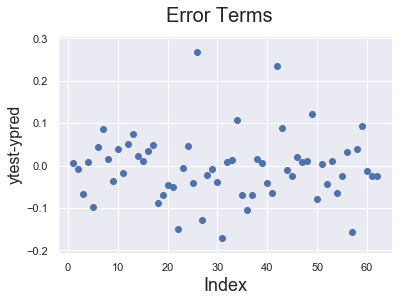

In [1991]:
# Model evaluation through error terms analysis:

# Lets scatter plot the error and see if the error is some random noise or white noise, or it has some pattern:

fig = plt.figure()
c = [i for i in range(1,63,1)]

plt.scatter(c,y_test-y_pred)

fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

In [1992]:
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


RMSE : 0.07733107307969775


In [1993]:
# Evaluation of model using summary statistics:

print(lr_15.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     123.8
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.36e-52
Time:                        21:08:10   Log-Likelihood:                 165.15
No. Observations:                 143   AIC:                            -316.3
Df Residuals:                     136   BIC:                            -295.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0275      0.013      2.153      0.0

In [1994]:
# Conclusions:

# 1. R-squared value of the model is 0.845 (~85 %) data variance explained by our regression model.This is a decent R-squared 
#    value. This means 84.5 % of the price value(target variable) variance is explained by the variables we have selected in
#    the model.
# 2. The R square and Adjusted R square value in model is almost same which are 0.845 and 0.838 respectively 
#    which indicates that none of the parameters in our model are reduntant. (Less than 1 % variance)
# 3. The R-square value of the train-data (0.845) and test-data (0.859) are also comparable. 
# 4. From Error Terms scatter plot we can see that the error (y_test-y-pred) is unequally distributed, and does not 
#    follow any pattern, as there is no curve, and shows no relation which indicates that it is just the white noise.
#    Also the error terms are also normally distributed which is basic assumption of linear regression.
# 5. The RSME value is 0.07733107307969775 
# 6. p-values - p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the
#    predictors are statistically significant.
# 7. F-stats and Prob(F-stats) (overall model fit) - 123.8 and 1.36e-52(approx. 0.0) - Model fit is significant and is just 
#    not by chance.
# 8. As we can see that the model seems to be stable, The variables that can affect price are as below:
#       1 horsepower
#       2 buick
#       3 bmw
#       4 rear 
#       5 hatchback 


In [ ]:
##################################### End of Assignment ########################################